<a href="https://colab.research.google.com/github/farhaanqazi/F21MP/blob/main/Masters_Project_F21MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MASTERS** **PROJECT**

#Importing Libraries

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot as plt
%matplotlib inline

import os
import tarfile
import urllib.request

#Inserting Dataset

In [ ]:
PDdata = pd.read_csv("https://raw.githubusercontent.com/farhaanqazi/F21MP/d2fc9961c91ef0f0472dc7afef8e0b52e7d557e4/PDdataset.csv")
PDdata

,ID,Dominant,Attempts,PC,Duration,Time,AreaError,Time Triangles_1,Time Triangles_2,Time Triangles_3,Time Triangles_4,Time Triangles_5,Distance,LeaveSurface,Side,TimeContact,ZeroVel,ZeroAcc
0,1,1,1,0,0.0,39.665,167.348008,11905,6366,8245,7358,8737,5.116981,1,1,39.650,3.705,4.165
1,1,1,2,0,0.0,35.970,163.696766,12252,5391,6327,4830,10154,5.101397,1,1,35.955,3.645,3.240
2,1,0,1,0,0.0,41.345,186.250734,15984,10015,8734,5812,5847,5.142272,2,1,41.315,4.330,4.940
3,1,0,2,0,0.0,37.230,168.193708,10251,9734,8706,4237,5978,5.037943,1,1,37.210,3.435,4.135
4,1,1,1,1,5.5,21.310,130.492186,6768,2635,3049,3929,6323,4.832446,2,1,20.605,2.600,1.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,57,0,1,1,8.0,47.855,215.030404,11713,9350,7798,10951,9344,4.371196,1,1,47.785,5.840,5.910
321,57,0,2,1,8.0,38.850,269.401405,12021,6741,5558,7961,7580,4.388300,1,1,38.735,2.740,4.330
322,58,1,1,1,5.5,125.620,95.772979,30223,22640,20957,29978,35681,4.400453,3,1,124.845,30.560,19.840
323,58,1,2,1,5.5,81.795,167.413682,18599,17073,15205,18316,18047,4.441692,2,1,81.025,12.525,11.685


#Data Preparation & Visualisation

In [ ]:
PDdata.head()

,ID,Dominant,Attempts,PC,Duration,Time,AreaError,Time Triangles_1,Time Triangles_2,Time Triangles_3,Time Triangles_4,Time Triangles_5,Distance,LeaveSurface,Side,TimeContact,ZeroVel,ZeroAcc
0,1,1,1,0,0.0,39.665,167.348008,11905,6366,8245,7358,8737,5.116981,1,1,39.650,3.705,4.165
1,1,1,2,0,0.0,35.970,163.696766,12252,5391,6327,4830,10154,5.101397,1,1,35.955,3.645,3.240
2,1,0,1,0,0.0,41.345,186.250734,15984,10015,8734,5812,5847,5.142272,2,1,41.315,4.330,4.940
3,1,0,2,0,0.0,37.230,168.193708,10251,9734,8706,4237,5978,5.037943,1,1,37.210,3.435,4.135
4,1,1,1,1,5.5,21.310,130.492186,6768,2635,3049,3929,6323,4.832446,2,1,20.605,2.600,1.850


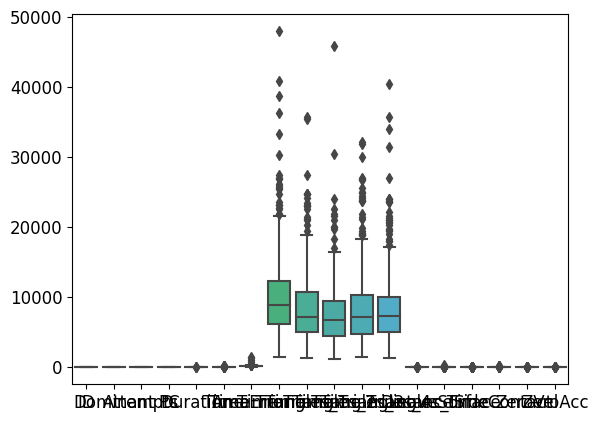

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#check the outliers
sns.boxplot(data=PDdata)
plt.show()

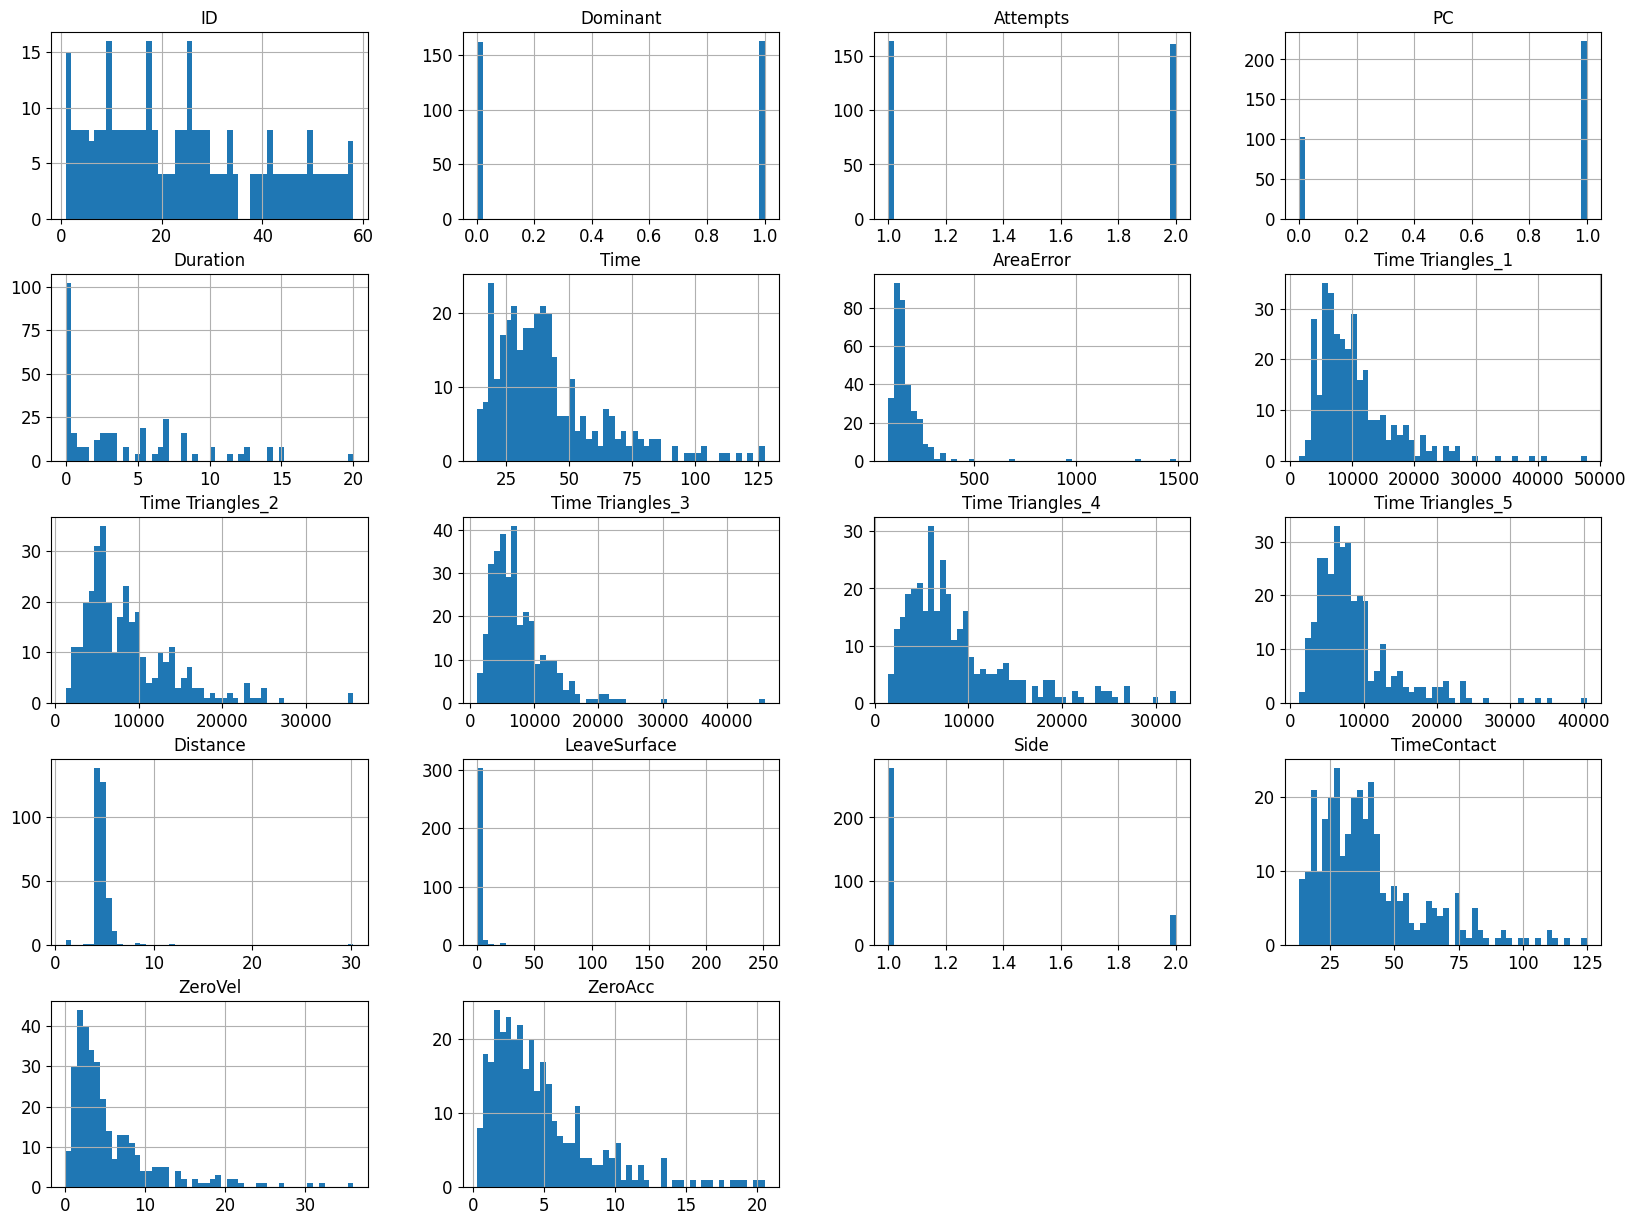

In [ ]:
PDdata.hist(bins=50, figsize=(20,15))
plt.show()

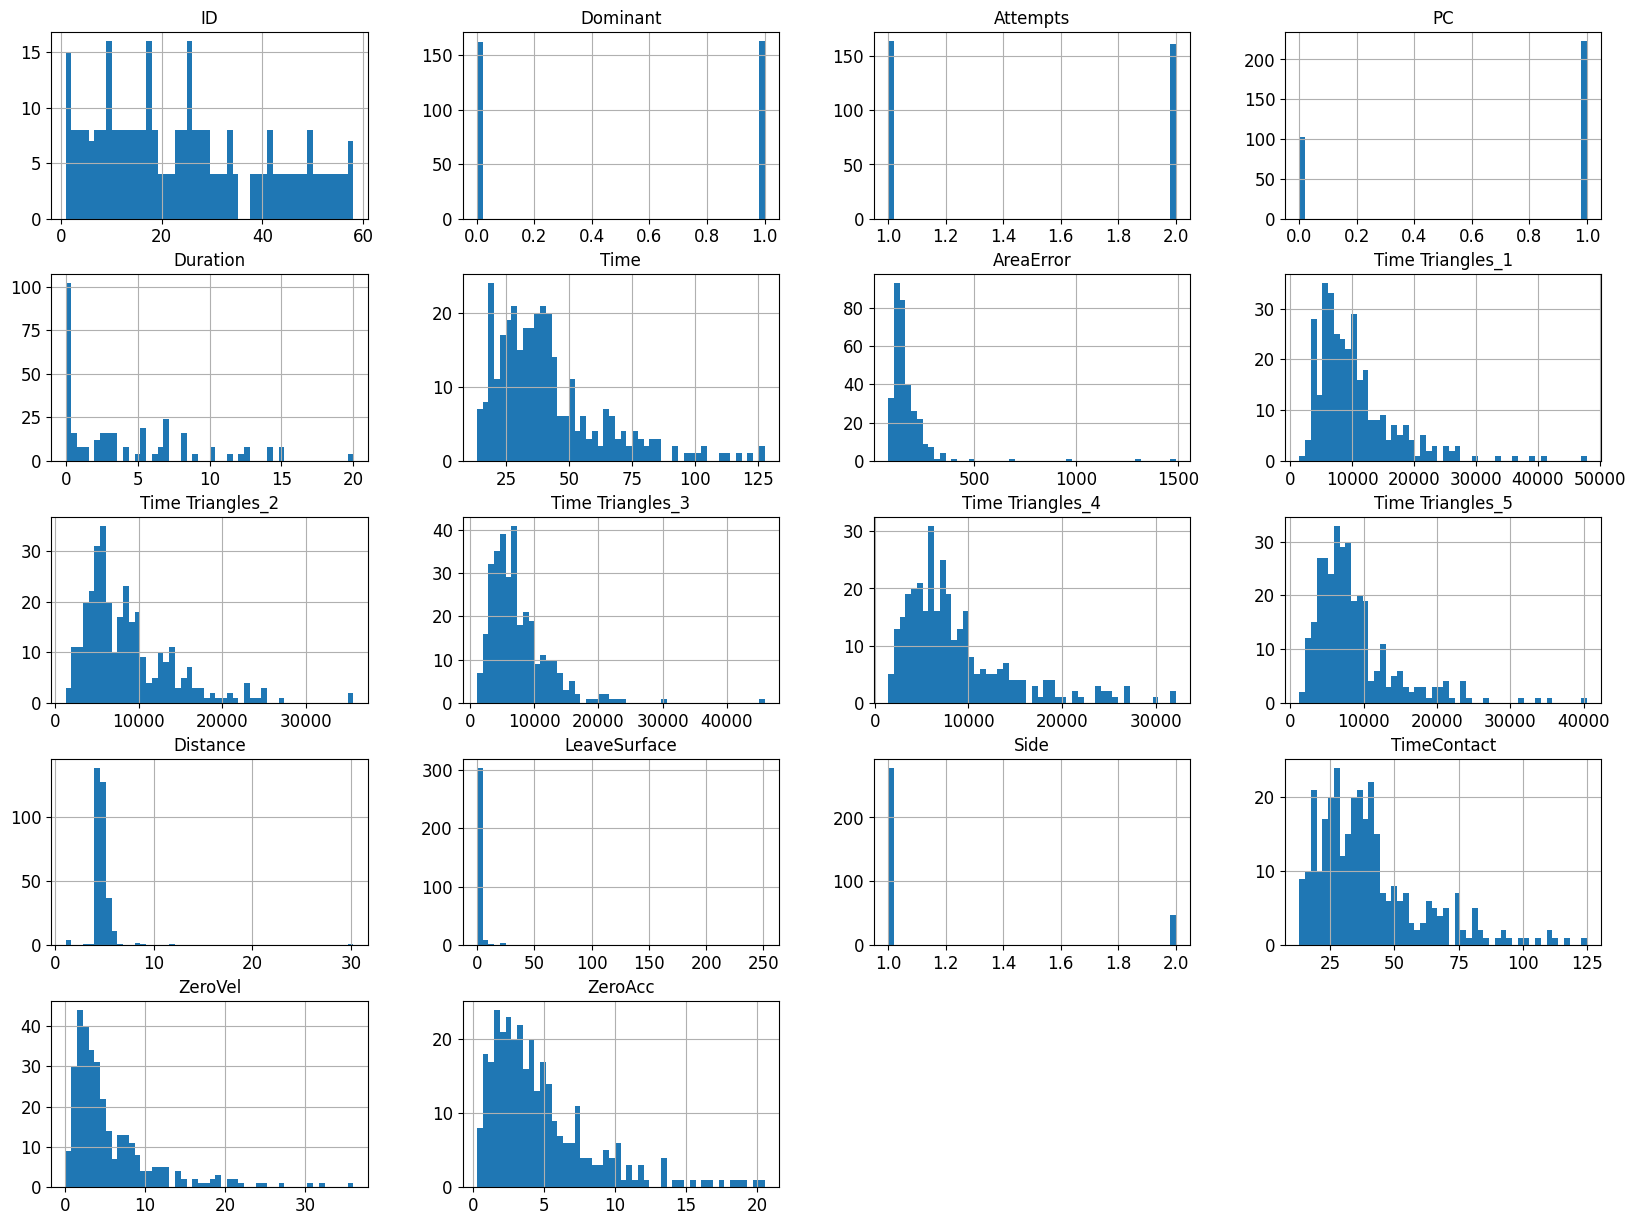

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
PDdata.hist(bins=50, figsize=(20,15))
save_fig = ("attribute_histogram_plots")
plt.show()

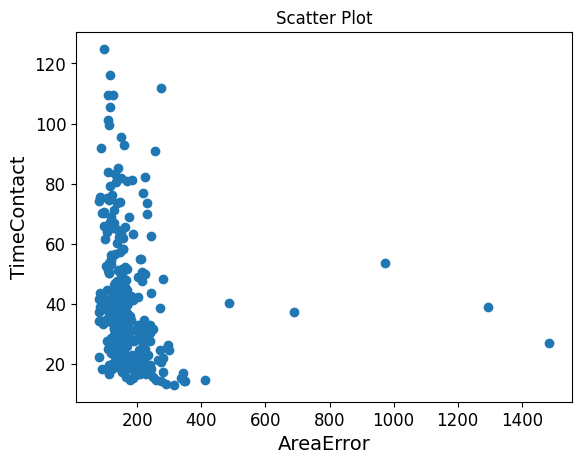

In [ ]:
# Create a scatter plot

# Replace 'X' and 'Y' with the actual column names from your dataset
x = PDdata['AreaError']
y = PDdata['TimeContact']

plt.scatter(x, y)

# Adding labels and title
plt.xlabel('AreaError')
plt.ylabel('TimeContact')
plt.title('Scatter Plot')

# Display the plot
plt.show()

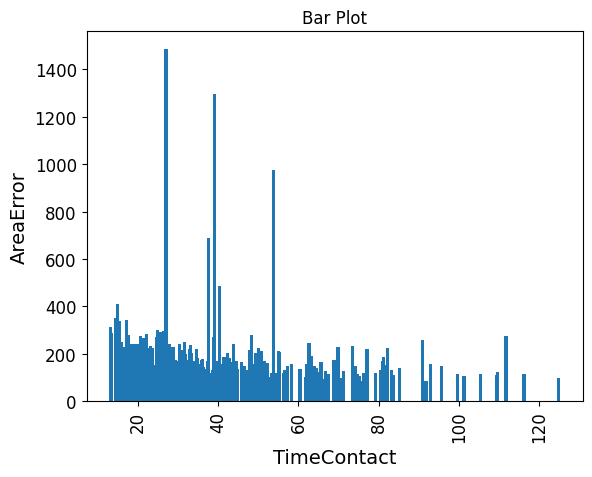

In [ ]:
plt.bar(PDdata['TimeContact'], PDdata['AreaError'])

# Adding labels and title
plt.xlabel('TimeContact')
plt.ylabel('AreaError')
plt.title('Bar Plot')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()








IndexError: ignored

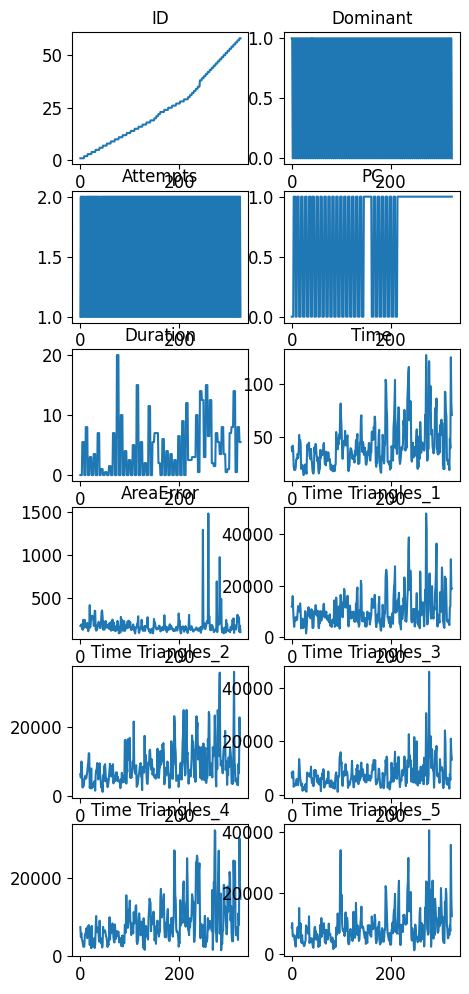

In [ ]:
# Plotting all columns as line plots
#PDdata.plot(kind='line', subplots=True, layout=(4, 3), figsize=(12, 10))

# Plotting all columns as line plots
n_columns = len(PDdata.columns)
n_rows = (n_columns + 2) // 3  # Calculates the number of rows needed

# Create subplots layout
fig, axes = plt.subplots( (n_rows), 2, figsize=(5, n_rows*2))

# Flatten axes if needed
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(PDdata.columns):
    PDdata[column].plot(ax=axes[i])
    axes[i].set_title(column)


# Adjusting the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

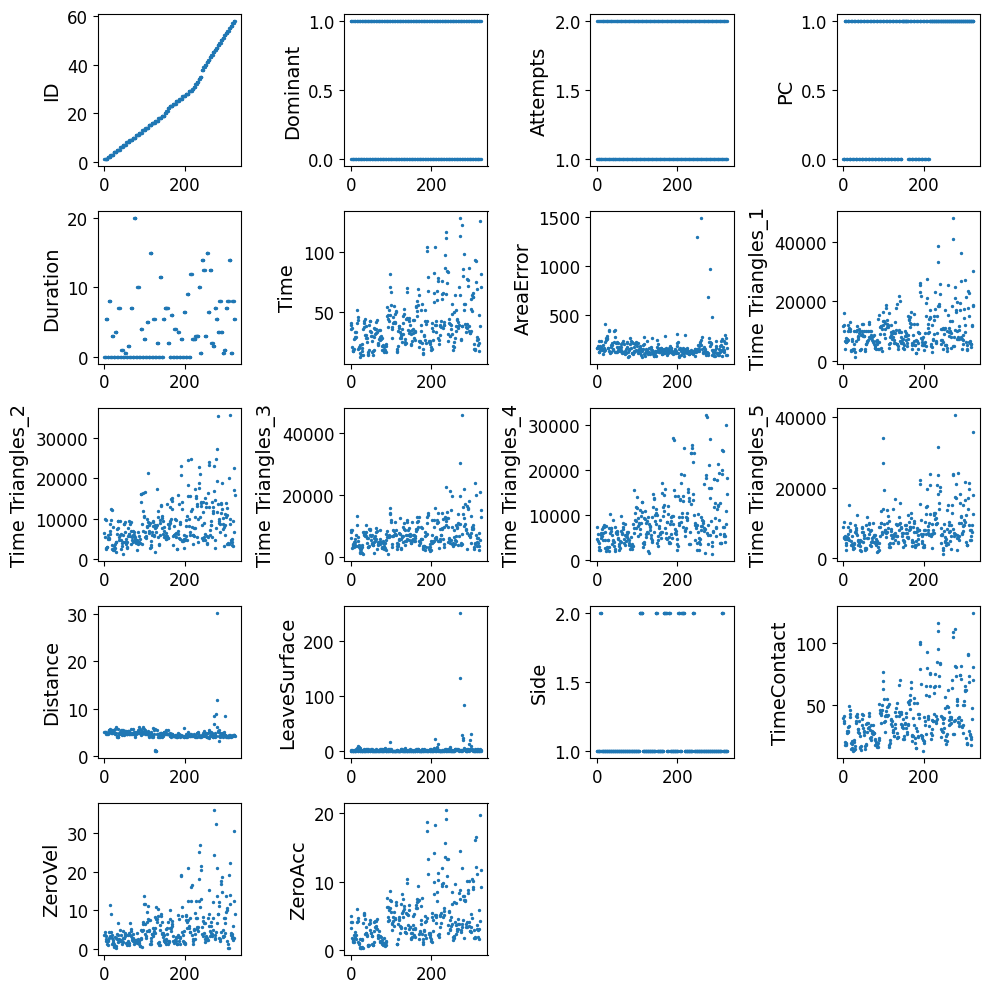

In [ ]:
# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (len(PDdata.columns) + num_cols - 1) // num_cols

# Create the subplots layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

dot_size = 2

# Flatten the axes if needed
axes = axes.flatten()

# Iterate over each column and plot the scatter plot
for i, column in enumerate(PDdata.columns):
    axes[i].scatter(PDdata.index, PDdata[column], s=dot_size)
    axes[i].set_ylabel(column)

# Remove any empty subplots
if len(PDdata.columns) < num_rows * num_cols:
    for j in range(len(PDdata.columns), num_rows*num_cols):
        fig.delaxes(axes[j])

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

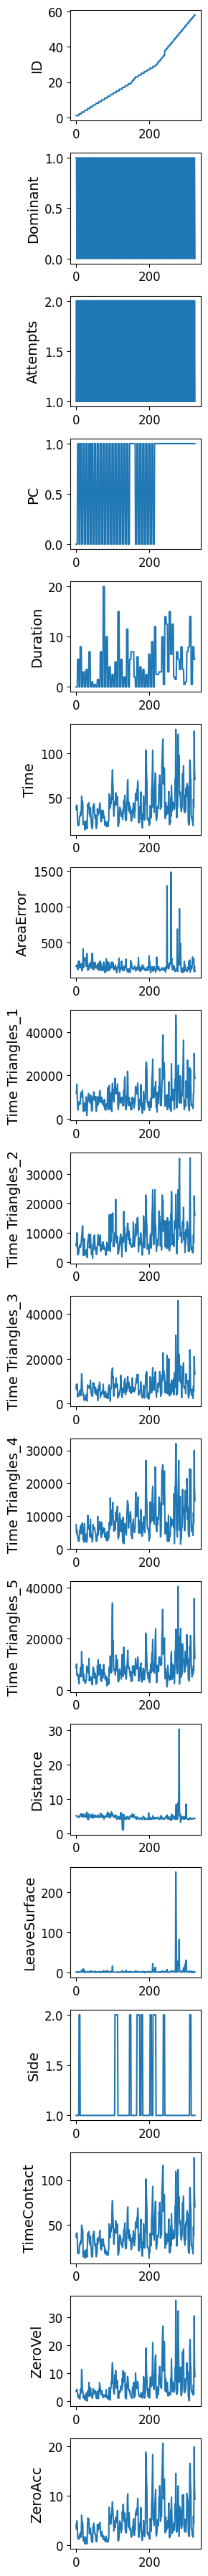

In [ ]:
# Set up inline plotting
%matplotlib inline

# Plotting line graphs for each column
fig, axes = plt.subplots(nrows=len(PDdata.columns), figsize=(3, 2 * len(PDdata.columns)))

for i, column in enumerate(PDdata.columns):
    axes[i].plot(PDdata[column])
    axes[i].set_ylabel(column)

# Adjusting the layout and spacing
plt.tight_layout()

# Save the figure if needed
# plt.savefig("line_graphs.png")

# Display the plots
plt.show()

In [ ]:
corr_matrix = PDdata.corr(method="pearson")
corr_matrix["Duration"].sort_values(ascending=False)

In [ ]:
PDdata["AreaError"].value_counts()

In [ ]:
PDdata["PC"].value_counts()

In [ ]:
PDdata

In [ ]:
PDdata.drop('PC',axis=1,inplace=True)
PDdata

#Clustering

In [ ]:
# running the kmeans algorithm, with 3 clusters
X_train = PDdata.values
X = X_train
kmeans = KMeans(n_clusters=3,random_state=230)
kmeans = kmeans.fit(X)
print("The clusters are: ", kmeans.labels_)
print("The Inertia is: ", kmeans.inertia_)

In [ ]:
y_pred = kmeans.predict(X_train)
y_pred

In [ ]:
y_pred is kmeans.labels_

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(kmeans.labels_,y_pred)

In [ ]:
# Inertia is a metric that shows how internally coherent clusters are.
# Finding the right number of k
no_of_clusters = range(2,15)
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X)
    i = kmeans.inertia_
    inertia.append(i)
    print("The inertia for :", f, "Clusters is:", i)

In [ ]:
import numpy as np
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xe = np.arange(len(no_of_clusters))
ax1.plot(xe, inertia)
ax1.set_xticks(xe)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [ ]:
# Running K means on 4b clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countcls = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"])

# display
countcls

In [ ]:
kmeans.labels_

In [ ]:
predictions

In [ ]:
#Silhouette method
import sklearn.cluster as cluster
from sklearn import metrics
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(kmeans.labels_, predictions)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [ ]:
X = PDdata.values

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Hierarchichal Clustering, is a method of cluster analysis which seeks to build a hierarchy of clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [ ]:
import scipy.cluster.hierarchy as sch
hc.fit(X)
dendro = sch.dendrogram(sch.linkage(X,method = "ward", metric = "euclidean"))

In [ ]:
hclabel = hc.labels_
hclabel

In [ ]:
from sklearn.preprocessing import StandardScaler
features=["Duration",	"Time",	"AreaError",	"Distance",	"TimeContact"]
X=PDdata[features]
z=StandardScaler()
X[features]=z.fit_transform(X)

#SOFT CLUSTERING

In [ ]:
from sklearn.mixture import GaussianMixture
EM=GaussianMixture(n_components=3)
EM.fit(X)
cluster=EM.predict(X)
cluster_probability=EM.predict_proba(X)
cluster_probability

In [ ]:
from sklearn.metrics import silhouette_score
#silhouette score is a metric used to calculate the goodness of a clustering technique(Min=-1, Max =+1)
silhouette_score(X,hclabel)

In [ ]:
print("silhouette: ",silhouette_score(X,cluster))

In [ ]:
from plotnine import*
(ggplot(X,aes(x="happiness_score",y="health",color="cluster"))+geom_point())

In [ ]:
(ggplot(X,aes(x="happiness_score",y="gdp_per_capita",color="cluster"))+geom_point())

In [ ]:
(ggplot(X,aes(x="happiness_score",y="freedom",color="cluster"))+geom_point())

In [ ]:
PDdata["happiness_score"].min()

In [ ]:
PDdata

In [ ]:
PDdata["happiness_score"] = pd.cut(x = PDdata["happiness_score"], bins = [0,5,np.inf], labels = ["Sad", "Happy"])
PDdata

In [ ]:
PDdata["happiness_score"] = PDdata["happiness_score"].map({"Happy":1, "Sad":0})

In [ ]:
X = PDdata.drop("happiness_score", axis = 1)

In [ ]:
y = PDdata["PC"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
X_train

In [ ]:
y_train

#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(30,20))
plot_tree(tree_clf, fontsize=13);

In [ ]:
yPred = tree_clf.predict(X_train)
accuracy = accuracy_score(y_train, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_train,yPred)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, classification_report, log_loss,silhouette_score
print(classification_report(y_train, yPred))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(tree_clf, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

accuracy = np.mean(scores) * 100
print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
yPred = tree_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, classification_report, log_loss,silhouette_score
print(classification_report(y_test, yPred))

In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [ ]:
%%time
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

In [ ]:
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,
                               'Accuracy per decision tree depth on training data')

In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    plot_tree(dt_classifier, fontsize=13)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "max_depth": [2],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [5, 10, 20, 50, 10]
}

grid_search = GridSearchCV(estimator=tree_clf, param_grid=params, cv=4,
                           n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
score_PDdata = pd.DataFrame(grid_search.cv_results_)
score_PDdata.head()

In [ ]:
score_PDdata.nlargest(5,"mean_test_score")

In [ ]:
grid_search.best_estimator_

In [ ]:
DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [ ]:
dt_best = grid_search.best_estimator_

# First matrix is for training data, second matrix is for test data
evaluate_model(dt_best)

In [ ]:
get_dt_graph(dt_best)

In [ ]:
sizeX30 = int( 0.30 * X_train.shape[0] )
xTrain30 = X_train[0:sizeX30]
newXTrain = X_train[sizeX30:]
newXTest = np.append(X_test, xTrain30, axis=0)

sizeY30 = int( 0.30 * y_train.shape[0])
yTrain30 = y_train[0:sizeY30]
newYTrain = y_train[sizeY30:]
newYTest = np.append(y_test, yTrain30, axis=0)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(newXTrain, newYTrain)

In [ ]:
yPred = tree_clf.predict(newXTrain)
accuracy = accuracy_score(newYTrain, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
yPred = tree_clf.predict(newXTest)

In [ ]:
accuracy = accuracy_score(newYTest, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
sizeX60 = int( 0.60 * X_train.shape[0] )
xTrain60 = X_train[0:sizeX60]
newXTrain = X_train[sizeX60:]
newXTest = np.append(X_test, xTrain60, axis=0)

sizeY60 = int( 0.60 * y_train.shape[0])
yTrain60 = y_train[0:sizeY60]
newYTrain = y_train[sizeY60:]
newYTest = np.append(y_test, yTrain60, axis=0)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(newXTrain, newYTrain)

In [ ]:
yPred = tree_clf.predict(newXTrain)
accuracy = accuracy_score(newYTrain, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
yPred = tree_clf.predict(newXTest)

In [ ]:
accuracy = accuracy_score(newYTest, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
PDdata

In [ ]:
X=PDdata.drop("cpi_score",axis=1)
y=PDdata["cpi_score"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Plotting the distribution of scores
PDdata.plot(x='gdp_per_capita', y='cpi_score', style='o')
plt.title('gdp vs cpi')
plt.xlabel('cpi score')
plt.ylabel('gdp')
plt.grid(color="black")
plt.show()

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train);

In [ ]:
linear.intercept_

In [ ]:
linear.coef_.shape

In [ ]:
linear.coef_

In [ ]:
X.shape

In [ ]:
y.shape

#Gradient Dscent

In [ ]:
# stochastic gradient descent (SGD) learning
# the gradient of the loss is estimated each sample and
# is updated by decreasing learning rate

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

linear_clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
linear_clf.fit(X_train, y_train)

pred = linear_clf.predict(X_test)
predx = linear_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

In [ ]:
PDdata2=pd.DataFrame({'Actual':y_test,'Predicted':pred})
PDdata2

In [ ]:
#Mean squared error
mean_squared_error(y_train, predx)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_clf, X_train, y_train, cv=10)
scores

In [ ]:
rsme=(np.sqrt(mean_squared_error(y_train, predx)))
rsme

In [ ]:
yPred = linear.predict(X_test)

In [ ]:
#Mean squared error
mean_squared_error(y_test, pred)

In [ ]:
# RMSE
rsme=(np.sqrt(mean_squared_error(y_test, pred)))
rsme

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

In [ ]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

In [ ]:
prediction_ridge=ridge_regressor.predict(X_test)

In [ ]:
PDdata2=pd.DataFrame({'Actual':y_test,'Predicted':prediction_ridge})
PDdata2

In [ ]:
X=PDdata.drop("happiness_score",axis=1)

In [ ]:
y=PDdata["happiness_score"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_train)
acc_score=accuracy_score(y_train,pred)
print("accuracy_score = ",acc_score)

In [ ]:
cls=classification_report(y_train,pred)
print("classification_report \n",cls)

# Logistic regression with testing data


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

# Multi layer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
model2=MLPClassifier()
model2.fit(X_train,y_train)
pred=model2.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

In [ ]:
cls=classification_report(y_test,pred)
print("classification_report \n",cls)

# Tweaking hyperparameters


In [ ]:
model3 = MLPClassifier(learning_rate = 'adaptive',activation='tanh')
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification


mlp_clf = MLPClassifier(random_state=1, max_iter=300, activation = "logistic", learning_rate_init = 0.008,
                        momentum = 0.9, validation_fraction = 0.2).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=450, activation = "logistic", learning_rate_init = 0.088,
                        momentum = 0.9, validation_fraction = 0.25).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=400, activation = "tanh", learning_rate_init = 0.05,
                        momentum = 0.09, validation_fraction = 0.4).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=270, activation = "identity", learning_rate_init = 0.09,
                        momentum = 0.9, validation_fraction = 0.6).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=100, activation = "logistic", learning_rate_init = 0.08,
                        momentum = 0.9, validation_fraction = 0.8).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=100, activation = "identity", learning_rate_init = 0.05,
                        momentum = 0.5, validation_fraction = 0.5).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

#### Moving 30% of training data to test data

In [ ]:
sizeX30 = int( 0.30 * X_train.shape[0] )
xTrain30 = X_train[0:sizeX30]
newXTrain = X_train[sizeX30:]
newXTest = np.append(X_test, xTrain30, axis=0)

sizeY30 = int( 0.30 * y_train.shape[0])
yTrain30 = y_train[0:sizeY30]
newYTrain = y_train[sizeY30:]
newYTest = np.append(y_test, yTrain30, axis=0)

In [ ]:
from sklearn.neural_network import MLPClassifier
model2=MLPClassifier()
model2.fit(X_train,y_train)
pred=model2.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

In [ ]:
cls=classification_report(y_test,pred)
print("classification_report \n",cls)

#### Moving 60% of data to test data

In [ ]:
sizeX60 = int( 0.60 * X_train.shape[0] )
xTrain60 = X_train[0:sizeX60]
newXTrain = X_train[sizeX60:]
newXTest = np.append(X_test, xTrain60, axis=0)

sizeY60 = int( 0.60 * y_train.shape[0])
yTrain60 = y_train[0:sizeY60]
newYTrain = y_train[sizeY60:]
newYTest = np.append(y_test, yTrain60, axis=0)

In [ ]:
from sklearn.neural_network import MLPClassifier
model2=MLPClassifier()
model2.fit(X_train,y_train)
pred=model2.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

In [ ]:
cls=classification_report(y_test,pred)
print("classification_report \n",cls)

In [ ]:
X=PDdata.drop("happiness_score",axis=1)
y=PDdata["happiness_score"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.neural_network import MLPClassifier

activ = ["identity","logistic","tanh","relu"]
solv = ["lbfgs","sgd","adam"]
lrn_rate = ["constant","invscaling","adaptive"]
lyr_size = [5,20,100,500]
momentum = [0.2,0.5,0.9]
val_frac = [0.1,0.5,0.9]
epochs = [200,500,1000,5000]

mlp_clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=100, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

In [ ]:
scores = []
for x in epochs:
    mlp_clf = MLPClassifier(random_state=1, max_iter=x, hidden_layer_sizes=20, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(epochs, scores, "bo-")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.axis([0,np.amax(epochs)*1.1,0,1])
plt.show()

In [ ]:
# Layer size
scores1 = []
for x in lyr_size:
    mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=x, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores1.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(lyr_size, scores1, "bo-")
plt.xlabel("Layer size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.axis([0,np.amax(lyr_size)*1.1,0,1])
plt.show()

In [ ]:
# Activation functions
scores4 = []
for x in activ:
    mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=20, activation=x, learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores4.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(activ, scores4, "bo-")
plt.xlabel("Activation function", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
#plt.axis([0,np.amax(lyr_size)*1.1,0,1])
plt.show()

In [ ]:
for x in lrn_rate:
    for y in lyr_size:
        scores6 = []
        for z in activ:
            mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=y, activation=z, learning_rate = x, momentum=0.9, validation_fraction=0.1)
            mlp_clf.fit(X_train, y_train)
            scores6.append(mlp_clf.score(X_test, y_test))

        print("Learn rate = ", x, "Layer size = ", y)
        plt.figure(figsize=(8, 3.5))
        plt.plot(activ, scores6, "bo-")
        plt.xlabel("Activation function", fontsize=14)
        plt.ylabel("Accuracy", fontsize=14)
        #plt.axis([0,np.amax(lyr_size)*1.1,0,1])
        plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

healthDataSet['state']=le.fit_transform(healthDataSet['state'])
healthDataSet
healthDataSet['county']=le.fit_transform(healthDataSet['county'])
healthDataSet

In [ ]:

corr_matrix = healthDataSet.corr()
corr_matrix["num_deaths"].sort_values(ascending=False)


In [ ]:
# if r > 0.9 (r < = -0.9) - Strong correlation
# else if  r >= 0.65 (r <= -0.65) - moderate correlation
# else  if  r >= 0.2 (r <= -0.2) -a weak correl


healthDataSet = healthDataSet.drop("population_density_per_sqmi", axis=1)
healthDataSet = healthDataSet.drop("percent_with_access_to_exercise_opportunities", axis=1)

#pd.set_option ('display.max_columns', None)
healthDataSet



In [ ]:
sample_incomplete_rows = healthDataSet[healthDataSet.isnull().any(axis=1)]
sample_incomplete_rows

In [ ]:
from sklearn.model_selection import train_test_split

y = healthDataSet["num_deaths"]
X = healthDataSet[healthDataSet.columns.difference(["num_deaths"])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler_x = StandardScaler()
# X_train = scaler_x.fit_transform(X_train)
# X_test = scaler_x.transform(X_test)

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Gaussian Naive Bayes accuracy
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
# from sklearn.metrics import precision_score
# precision_score(y_test, y_pred)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
plot_tree(tree_clf);

In [ ]:
#Decision Tree
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)

In [ ]:
cm[0][0]

In [ ]:
y_test

In [ ]:
y_pred.size

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
# a K-Means clusterer on my dataset. It will try to find each center and assign each instance to the closest:
#fit and predict Compute cluster centers and predict cluster index for each sample.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init="random", random_state=42).fit(X_train)
y_pred = kmeans.predict(X_test)

In [ ]:
#accuracy for Kmeans
from sklearn.metrics.cluster import rand_score
rand_score(y_test, y_pred)

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred,average="weighted")

In [ ]:
# Gaussian Naive Bayes accuracy
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
cm

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FP

In [ ]:
FN = cm.sum(axis=1) - np.diag(cm)
FN

In [ ]:
TP = np.diag(cm)
TP

In [ ]:
TN = cm.values.sum() - (FP + FN + TP)

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4, covariance_type='tied', max_iter=100,init_params="random")
gmm.fit(X_train)
yclust = gmm.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
rand_score(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)
rand_score(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)